# Cosine Similarity

We will make extensive use of the cosine similarity, this notebook is a presentation of this central metric.

Cosine similarity is a measure of the similarity of 2 numerical vectors.

In this notebook:
* What is cosine similarity?
* Where does it come from?
* How is it computed?
* What is the link with the dot product?
* How can we evaluate whether a change will increase or decrease similarity?

## Vectors

We focus on **vectors of real numbers of finite dimensionality**
* A **vector** $\textrm{v}$ has $N$ **coefficients**
* Each coefficient is a **real number**
* $N$ is the **number of dimensions**
* We write $\textrm{v} = (v_1, v_2, v_3, ..., v_{N}) \in \mathbb{R}^N$

We can easily represent 2-D vectors as arrows anchored at the origin point and pointing towards the coordinates.



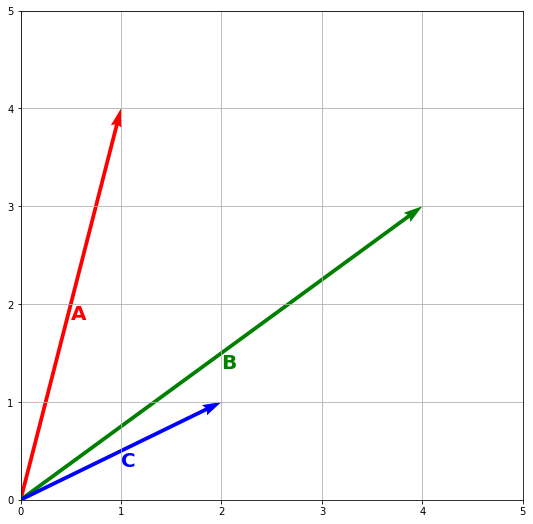

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

A = [1, 4]
B = [4, 3]
C = [2, 1]

colors = ['r', 'g', 'b']

V = np.array([A, B, C])
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

plt.figure(figsize=(9, 9))
plt.quiver(*origin, V[:,0], V[:,1], color=colors, angles='xy', scale_units='xy', scale=1)
for letter, x, y, color in zip('ABC', V[:, 0], V[:, 1], colors):
    plt.text(x / 2., y / 2., letter, fontdict={'size': 20, 'color': color, 'weight': 'bold'}, verticalalignment='top')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid()
plt.show()

## Vector Similarities

**Problem Statement**

Which of vectors A and C is the most similar to vector B ?

To answer this, we need a framework to measure similarity.

**Angle as a measure of similarity**

We use the angle between 2 vectors to evaluate how similar they are. Their angle is indicative of the fact that they point towards a similar direction, and is independent of their relative length.
* We favor the direction that vectors point towards
* Angle is a measure of difference between 2 directions
* We can use the Cosine of this angle:
   * `0.0` indicates it is a 90-degree angle: most dissimilar
   * `1.0` indicates it is a flat angle: most similar

## Sklearn

The function `cosine_similarity` works as follows:
* Takes in 1 or 2 lists of vectors $N$ in the first list, $M$ in the second
* $A$ is the first list, $B$ the second (if only 1 list, then both are $A$)
* Outputs a $N \times M$ matrix
* $\textrm{Sim}_{i,j} = cos(A_i, B_j)$
* If only one matrix is given, then:
   * $\textrm{Sim}$ is square
   * $\textrm{Sim}$ is symetric
   * The diagonal is made of `1`


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

sims = cosine_similarity([A, B, C])

In [ ]:
# from https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

from mpl_toolkits.axes_grid1 import make_axes_locatable


def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels, fontdict={'size': 20, 'weight': 'bold'})
    ax.set_yticklabels(row_labels, fontdict={'size': 20, 'weight': 'bold'})

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

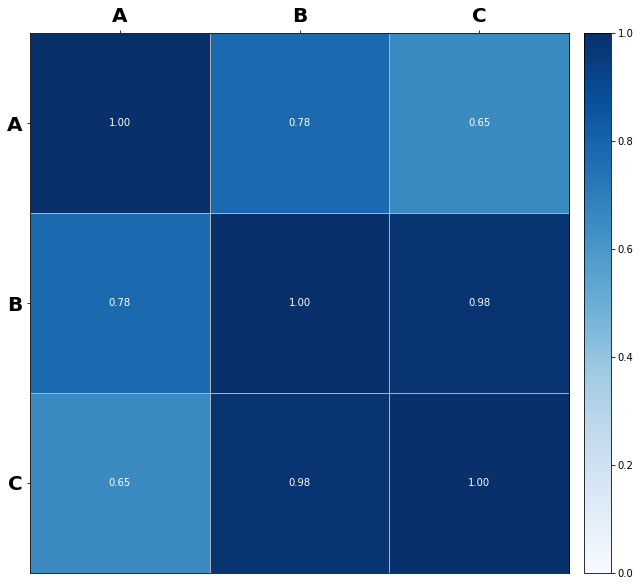

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))

im = heatmap(sims, list('ABC'), list('ABC'), ax=ax,
                   cmap="Blues", cbarlabel="Cosine Similarity", vmin=0.0, vmax=1.0)
texts = annotate_heatmap(im, valfmt="{x:.2f}")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
fig.colorbar(im, cax=cax)

fig.tight_layout()
plt.show()


Under this definition of similarity, the vector $C$ is the most similar to $B$.

# Mathematical Definition

Given 2 vectors of dimension $N$: $\textrm{u, v}$ 


---



**Dot Product**

$
\begin{align}
\textrm{u} \cdot \textrm{v} = \sum_{i=1}^{N} \left( \textrm{u}_i * \textrm{v}_i \right)
\end{align}
$



---

**Norm**

$
\begin{align}
\left\Vert \textrm{u} \right\Vert = \sqrt{\textrm{u} \cdot \textrm{u}} = \sqrt{\sum_{i=1}^N \textrm{u}_i^2}
\end{align}
$



---

**Cosine Similarity**

$
\begin{align}
cos \left( \textrm{u}, \textrm{v} \right) = \frac{\textrm{u} \cdot \textrm{v}}{\left\Vert \textrm{u} \right\Vert * \left\Vert \textrm{v} \right\Vert}
\end{align}
$



# The story with the non-zeros in different dimensions

We will refer to this during the class, especially in link with Bag of Words techniques of text representations.

Say we have 2 vectors:
* $\textrm{u} = (0, 2, 4, 1)\; \left\Vert \textrm{u} \right\Vert = 4.58 $
* $\textrm{v} = (2, 0, 4, 2)\; \left\Vert \textrm{v} \right\Vert = 4.90 $
* $\textrm{u} \cdot \textrm{v} = 18$
* $cos(\textrm{u}, \textrm{v}) = 0.80$

When these vectors are Bag of Words, each dimension is a word that we count in a text:
* Dimension 1 is the count of `cat`
* Dimension 2 is the count of `cats`

Now if one text uses `cat` and the other `cats`, these dimensions will not contribute to the dot product, as $0*x=0$.


In [ ]:
u = [0, 2, 4, 1]
v = [2, 0, 4, 2]

print(f'||u|| = {np.sqrt(sum(map(np.square, u))):>4.2f}')
print(f'||v|| = {np.sqrt(sum(map(np.square, v))):>4.2f}')
print(f'u . v = {np.dot(u, v)}')
print(f'cos (u, v): {cosine_similarity([u], [v])[0][0]:>3.2f}')

||u|| = 4.58
||v|| = 4.90
u . v = 18
cos (u, v): 0.80


We used stemming to count `cat` and `cats` under the same dimension:
* $\textrm{u} = (2, 4, 1)\; \left\Vert \textrm{u} \right\Vert = 4.58 $
* $\textrm{v} = (2, 4, 2)\; \left\Vert \textrm{v} \right\Vert = 4.90 $
* $\textrm{u} \cdot \textrm{v} = 22$
* $cos(\textrm{u}, \textrm{v}) = 0.98$

The norms of the vectors did not change, but the cosine similarity changed a lot, from $0.80$ to $0.98$, because the dot-product increased.


In [ ]:
u = [2, 4, 1]
v = [2, 4, 2]

print(f'||u|| = {np.sqrt(sum(map(np.square, u))):>4.2f}')
print(f'||v|| = {np.sqrt(sum(map(np.square, v))):>4.2f}')
print(f'u . v = {np.dot(u, v)}')
print(f'cos (u, v): {cosine_similarity([u], [v])[0][0]:>3.2f}')

||u|| = 4.58
||v|| = 4.90
u . v = 22
cos (u, v): 0.98


# Take-Away

As much as possible, we should align dimensions:
* Similar things should be counted under the same dimension, to increase the dot-product, and therefore the cosine similarity, by aligning the non-zero values
* Disimilar things should be counted on different dimensions, to favor the alignment of zero-values